In [1]:
import wandb 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/tmp/ipykernel_460624/3789299041.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
entity = 'l65'

In [3]:
wandb.init(entity=entity)

Failed to detect the name of this notebook, you can set it manually with the WANDB_NOTEBOOK_NAME environment variable to enable code saving.
wandb: Currently logged in as: ggarciatarrach (l65). Use `wandb login --relogin` to force relogin


In [29]:
# Assuming you have an API key set up, either through the environment variable or login
api = wandb.Api()

# Specify the projects to search
projects = [
    # 'Mamba_pe1b_Experiments_round_1', 
    # 'Multi_pe1u_Experiments_round_1',
    # 'Mamba_Baseline_Experiments_round_1',
    # 'graphssm_experiments_round_1',
        'Subgraph_Experiments_round_1',
        'Mamba_pe2b_Experiments_round_1',
        'Mean_Baseline_Experiments_round_1',
        'Mamba_pe1u_Experiments_round_1',
        'Mamba_pe1u_noise_Experiments_round_1',
        'Mamba_pe1b_Experiments_round_1',
        'Multi_pe1u_Experiments_round_1',
        'Mamba_Baseline_Experiments_round_1',
        'graphssm_experiments_round_1',
    ]

PASCAL_VOC = 'edge_wt_region_boundary'
PEPTIDES_FUNC = 'peptides-functional'
PEPTIDES_STRUCT = 'peptides-structural'

dataset = PASCAL_VOC

filtered_runs = []

for project in projects:
    runs = api.runs(f"{entity}/{project}")
    for run in runs:
        if 'dataset' in run.config and 'name' in run.config['dataset']:
            if run.config['dataset']['name'] == dataset:
                filtered_runs.append(run)

# Filter to only those that didn't crash
num_original_runs = len(filtered_runs)
max_epochs = max([run.summary.get('train/epoch', 0) for run in filtered_runs])
filtered_runs = [run for run in filtered_runs if run.summary.get('train/epoch', 0) == max_epochs]
print(f"Filtered {num_original_runs} runs to {len(filtered_runs)} finished runs")

# Now `filtered_runs` contains all runs across specified projects tagged with 'dataset_x'
# You can iterate over `filtered_runs` to compare them or further analyze the data
for run in filtered_runs:
    print(f"Run ID: {run.id}, Run name: {run.name} Project: {run.project}, Metrics: {run.summary}")


Filtered 26 runs to 19 finished runs
Run ID: xv7yxifh, Run name: VOCSuperpixels-edge_wt_region_boundary.GPS.CustomGatedGCN+EfficientSubgraph_Mamba_L65.r2 Project: Subgraph_Experiments_round_1, Metrics: {'train/epoch': 299, 'test/accuracy': 0.7072, 'best_train_perf': 0.27768, 'best/val_loss': 1.69188432, 'test/auc': 0.50016, 'val/params': 573045, 'test/params': 573045, 'val/accuracy': 0.69638, 'best/train_f1': 0.27768, 'best_val_perf': 0.18862, 'test/f1': 0.03945, '_timestamp': 1710298786.8259127, 'best/val_f1': 0.18862, 'val/auc': 0.49277, 'val/lr': 0, 'train/accuracy': 0.6987, 'val/time_epoch': 1.69092, 'train/eta_hours': 0, 'full_epoch_time_sum': 7854.219280814752, '_step': 299, 'train/f1': 0.03917, 'train/lr': 4e-08, 'train/auc': 0.50891, 'val/epoch': 299, 'test/time_iter': 0.03762, 'full_epoch_time_avg': 26.180730936049173, '_runtime': 7857.2083287239075, 'val/loss': 'NaN', 'test/loss': 'NaN', 'test/epoch': 299, 'train/loss': 'NaN', 'best/test_loss': 1.64546607, 'best_test_perf': 0

In [30]:
# Container for aggregated run data
run_data = []

for run in filtered_runs:
    # Fetch history for each run; adjust `keys` based on what you need (e.g., "val/f1")
    history = run.history()
    history['approach'] = run.project
    history['dataset'] = dataset
    history['step'] = history.index
    run_data.append(history)
    
df = pd.concat(run_data)


In [31]:
df.columns

Index(['_timestamp', 'train/time_epoch', 'test/auc', 'train/params',
       'test/time_epoch', 'test/accuracy', 'train/accuracy', 'best/test_loss',
       'best/train_f1', 'val/params', 'test/params', 'val/lr',
       'best/train_loss', 'val/accuracy', 'train/loss', 'val/loss',
       'train/eta', 'best/test_f1', 'best/val_loss', 'test/time_iter',
       'test/f1', 'train/epoch', 'val/epoch', 'val/time_iter',
       'train/eta_hours', '_step', 'val/time_epoch', 'val/auc', 'test/lr',
       'train/f1', 'train/lr', 'test/loss', 'val/f1', 'best/val_f1',
       'train/auc', 'train/time_iter', '_runtime', 'test/epoch', 'best/epoch',
       'approach', 'dataset', 'step'],
      dtype='object')

/home/guillem/anaconda3/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/guillem/anaconda3/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/guillem/anaconda3/envs/L65/lib/python3.10/site-packages/seaborn/_base.py:948: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/home/guillem/an

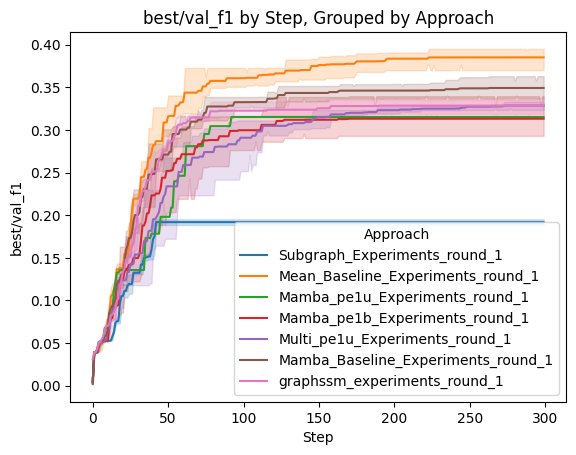

In [33]:
# Assuming 'df' is your pandas DataFrame
y_axis_key = 'best/val_f1'

sns.lineplot(data=df, x='step', y=y_axis_key, hue='approach')

plt.xlabel('Step')
plt.ylabel(y_axis_key)
plt.title(f'{y_axis_key} by Step, Grouped by Approach')
plt.legend(title='Approach')
plt.show()

In [20]:
run=filtered_runs[0]

In [21]:
run.history()

,val/time_iter,val/time_epoch,test/lr,train/time_epoch,_step,test/accuracy,best/epoch,train/eta,val/accuracy,test/loss,...,best/val_loss,train/time_iter,train/lr,train/ap,best/val_ap,test/time_iter,train/auc,val/params,best/test_loss,test/epoch
0,0.02713,0.51553,0,5.70166,0,0.16465,0,1134.63099,0.16482,0.719450,...,0.720827,0.06708,0.000000e+00,0.22099,0.22576,0.02700,0.51902,382810,0.719450,0
1,0.01659,0.31516,0,3.04326,1,0.16465,1,865.74788,0.16482,0.582562,...,0.581151,0.03580,1.000000e-04,0.25115,0.26282,0.01666,0.60003,382810,0.582562,1
2,0.01671,0.31740,0,3.04263,2,0.16465,2,774.04958,0.16482,0.622401,...,0.623090,0.03580,2.000000e-04,0.27080,0.28544,0.01674,0.64003,382810,0.622401,2
3,0.01661,0.31556,0,3.04023,3,0.16465,3,726.56155,0.16482,0.574437,...,0.574575,0.03577,3.000000e-04,0.30316,0.32555,0.01672,0.67674,382810,0.574437,3
4,0.01666,0.31646,0,3.03833,4,0.16465,4,696.77838,0.16482,0.551520,...,0.551010,0.03575,4.000000e-04,0.33257,0.34117,0.02557,0.70241,382810,0.551520,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.01659,0.31518,0,3.00320,195,0.16465,158,12.36491,0.16482,0.515594,...,0.494120,0.03533,1.710000e-06,0.99747,0.65236,0.01661,0.99984,382810,0.502469,195
196,0.01659,0.31516,0,3.00156,196,0.16465,158,9.27232,0.16482,0.512236,...,0.494120,0.03531,1.090000e-06,0.99787,0.65236,0.01659,0.99984,382810,0.502469,196
197,0.01659,0.31524,0,2.99802,197,0.16465,158,6.18061,0.16482,0.514640,...,0.494120,0.03527,6.200000e-07,0.99723,0.65236,0.01661,0.99982,382810,0.502469,197
198,0.01658,0.31497,0,3.00106,198,0.16465,158,3.08986,0.16482,0.511284,...,0.494120,0.03531,2.700000e-07,0.99755,0.65236,0.01658,0.99984,382810,0.502469,198


In [22]:
run_data[0]

,val/time_iter,val/time_epoch,test/lr,train/time_epoch,_step,test/accuracy,best/epoch,train/eta,val/accuracy,test/loss,...,train/ap,best/val_ap,test/time_iter,train/auc,val/params,best/test_loss,test/epoch,approach,dataset,step
0,0.02713,0.51553,0,5.70166,0,0.16465,0,1134.63099,0.16482,0.719450,...,0.22099,0.22576,0.02700,0.51902,382810,0.719450,0,Mean_Baseline_Experiments_round_1,peptides-functional,0
1,0.01659,0.31516,0,3.04326,1,0.16465,1,865.74788,0.16482,0.582562,...,0.25115,0.26282,0.01666,0.60003,382810,0.582562,1,Mean_Baseline_Experiments_round_1,peptides-functional,1
2,0.01671,0.31740,0,3.04263,2,0.16465,2,774.04958,0.16482,0.622401,...,0.27080,0.28544,0.01674,0.64003,382810,0.622401,2,Mean_Baseline_Experiments_round_1,peptides-functional,2
3,0.01661,0.31556,0,3.04023,3,0.16465,3,726.56155,0.16482,0.574437,...,0.30316,0.32555,0.01672,0.67674,382810,0.574437,3,Mean_Baseline_Experiments_round_1,peptides-functional,3
4,0.01666,0.31646,0,3.03833,4,0.16465,4,696.77838,0.16482,0.551520,...,0.33257,0.34117,0.02557,0.70241,382810,0.551520,4,Mean_Baseline_Experiments_round_1,peptides-functional,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,0.01659,0.31518,0,3.00320,195,0.16465,158,12.36491,0.16482,0.515594,...,0.99747,0.65236,0.01661,0.99984,382810,0.502469,195,Mean_Baseline_Experiments_round_1,peptides-functional,195
196,0.01659,0.31516,0,3.00156,196,0.16465,158,9.27232,0.16482,0.512236,...,0.99787,0.65236,0.01659,0.99984,382810,0.502469,196,Mean_Baseline_Experiments_round_1,peptides-functional,196
197,0.01659,0.31524,0,2.99802,197,0.16465,158,6.18061,0.16482,0.514640,...,0.99723,0.65236,0.01661,0.99982,382810,0.502469,197,Mean_Baseline_Experiments_round_1,peptides-functional,197
198,0.01658,0.31497,0,3.00106,198,0.16465,158,3.08986,0.16482,0.511284,...,0.99755,0.65236,0.01658,0.99984,382810,0.502469,198,Mean_Baseline_Experiments_round_1,peptides-functional,198


In [25]:
import wandb

# Initialize the W&B API
api = wandb.Api()


In [26]:
counts = {}
metric_names = {
    'l65/FinalExperiments-peptides-func': 'best/test_ap',
    'l65/FinalExperiments-peptides-struct': 'best/test_mae',
    'l65/FinalExperiments-vocsp': 'best/test_f1'
}

metrics = {}

for project_path in metric_names:

    # Access the specified project
    runs = api.runs(project_path)

    counts[project_path] = {}
    metrics[project_path] = {}

    # Iterate through all runs in the project
    for run in runs:
        # Assuming you want to concatenate tags into a single string separated by underscores
        experiment_name = '__'.join(run.tags)

        counts[project_path][experiment_name] = counts[project_path].get(experiment_name, 0) + 1
        metrics[project_path][experiment_name] = metrics[project_path].get(experiment_name, []) + [run.summary[metric_names[project_path]]]
        
        # Update the run's config with the new 'experiment_name'
        run.config.update({"experiment_name": experiment_name}, allow_val_change=True)
        
        # To save the config change, you need to call .update() on the run
        run.update()

# Display table of counts (rows are projects, columns are experiment names)
import pandas as pd
pd.DataFrame(counts).fillna(0.0)

,l65/FinalExperiments-peptides-func,l65/FinalExperiments-peptides-struct,l65/FinalExperiments-vocsp
baseline-mean,3.0,2.0,3.0
pe1u_noise,3.0,0.0,0.0
pe1b,3.0,3.0,3.0
multi10,3.0,3.0,3.0
baseline-mamba,3.0,3.0,3.0
GraphSSM,3.0,3.0,3.0
pe1u,0.0,1.0,1.0
subgraph,0.0,0.0,2.0
pe2b,0.0,0.0,2.0
,0.0,0.0,2.0


In [31]:
import pandas as pd
import numpy as np

# Initialize an empty dictionary to hold the formatted results
formatted_metrics = {}

# Iterate through each top-level key (which will be our rows)
for key, experiments in metrics.items():
    # Initialize a nested dictionary for each row
    formatted_metrics[key] = {}
    # Iterate through the experiments (second-level keys) to calculate mean and std. dev.
    for experiment, values in experiments.items():
        mean = np.mean(values)
        std_dev = np.std(values)
        # Format the result as 'mean ± std. dev.' and assign it to the corresponding experiment
        formatted_metrics[key][experiment] = f"{mean:.4f} ± {std_dev:.4f}"

# Convert the formatted results dictionary to a pandas DataFrame for easy tabular display
df_metrics = pd.DataFrame(formatted_metrics)  # Transpose for the desired orientation

df_metrics

,l65/FinalExperiments-peptides-func,l65/FinalExperiments-peptides-struct,l65/FinalExperiments-vocsp
baseline-mean,0.6470 ± 0.0021,0.2490 ± 0.0003,0.3854 ± 0.0061
pe1u_noise,0.6431 ± 0.0024,NaN,NaN
pe1b,0.5902 ± 0.0126,0.2647 ± 0.0028,0.3197 ± 0.0204
multi10,0.6110 ± 0.0192,0.2610 ± 0.0034,0.3296 ± 0.0075
baseline-mamba,0.6719 ± 0.0135,0.2485 ± 0.0017,0.3582 ± 0.0162
GraphSSM,0.6427 ± 0.0037,0.2641 ± 0.0022,0.3388 ± 0.0095
pe1u,NaN,0.2622 ± 0.0000,0.3387 ± 0.0000
subgraph,NaN,NaN,0.1965 ± 0.0049
pe2b,NaN,NaN,0.3047 ± 0.0129
,NaN,NaN,0.3919 ± 0.0003


In [32]:
print(df_metrics.to_latex())

\begin{tabular}{llll}
\toprule
 & l65/FinalExperiments-peptides-func & l65/FinalExperiments-peptides-struct & l65/FinalExperiments-vocsp \\
\midrule
baseline-mean & 0.6470 ± 0.0021 & 0.2490 ± 0.0003 & 0.3854 ± 0.0061 \\
pe1u_noise & 0.6431 ± 0.0024 & NaN & NaN \\
pe1b & 0.5902 ± 0.0126 & 0.2647 ± 0.0028 & 0.3197 ± 0.0204 \\
multi10 & 0.6110 ± 0.0192 & 0.2610 ± 0.0034 & 0.3296 ± 0.0075 \\
baseline-mamba & 0.6719 ± 0.0135 & 0.2485 ± 0.0017 & 0.3582 ± 0.0162 \\
GraphSSM & 0.6427 ± 0.0037 & 0.2641 ± 0.0022 & 0.3388 ± 0.0095 \\
pe1u & NaN & 0.2622 ± 0.0000 & 0.3387 ± 0.0000 \\
subgraph & NaN & NaN & 0.1965 ± 0.0049 \\
pe2b & NaN & NaN & 0.3047 ± 0.0129 \\
 & NaN & NaN & 0.3919 ± 0.0003 \\
\bottomrule
\end{tabular}

